In [1]:
# The combined dataset (CBD, RGS14)
!gdown 1ehFjGDN8SrvKNnGtWllkCbROkf1Lz9fJ

Downloading...
From: https://drive.google.com/uc?id=1ehFjGDN8SrvKNnGtWllkCbROkf1Lz9fJ
To: /content/combined_cycles.csv
100% 84.1M/84.1M [00:01<00:00, 77.3MB/s]


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

combined = pd.read_csv('combined_cycles.csv')
sns.set_theme()

In [3]:
combined

,Unnamed: 0,index,is_good,start_sample,stop_sample,peak_sample,desc_sample,trough_sample,duration_samples,max_amp,...,max_if,range_if,asc2desc,peak2trough,rat,study_day,condition,treatment,trial_num,state
0,0,1,1,33,-8.973636,33.553083,67.041041,96.137640,129,373.761221,...,9.809015,2.733988,0.514848,0.519698,2,4,HC,2,5,tonic
1,1,2,1,162,-1.411947,21.338614,43.684685,68.085696,91,217.977562,...,12.049334,2.282271,0.486296,0.480051,2,4,HC,2,5,tonic
2,2,3,1,253,-10.117383,26.816301,52.526527,76.701112,101,275.484119,...,11.185489,1.975035,0.506091,0.520065,2,4,HC,2,5,tonic
3,3,4,1,354,-4.615427,24.140029,47.714715,76.281146,105,382.886366,...,11.181895,2.770510,0.503418,0.454426,2,4,HC,2,5,tonic
4,4,5,1,459,-17.455032,29.900513,60.989990,91.502379,121,398.826153,...,8.824265,0.869578,0.490894,0.504050,2,4,HC,2,5,tonic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378263,12,20,1,6176,-17.115417,84.750896,156.332332,239.039009,370,4844.849707,...,9.497385,4.658221,0.583005,0.422520,5,7,HC,1,4,phasic
378264,13,21,1,6546,-5.817069,102.986145,188.608609,245.278470,310,3552.271363,...,14.604965,9.562594,0.540992,0.608415,5,7,HC,1,4,phasic
378265,14,22,1,6856,-53.744529,46.960897,93.725726,165.471979,233,2532.782744,...,15.408437,6.827489,0.491369,0.402256,5,7,HC,1,4,phasic
378266,15,23,1,7089,-0.975397,63.530878,135.658659,186.044793,241,2505.520262,...,12.707624,4.118521,0.491644,0.562899,5,7,HC,1,4,phasic


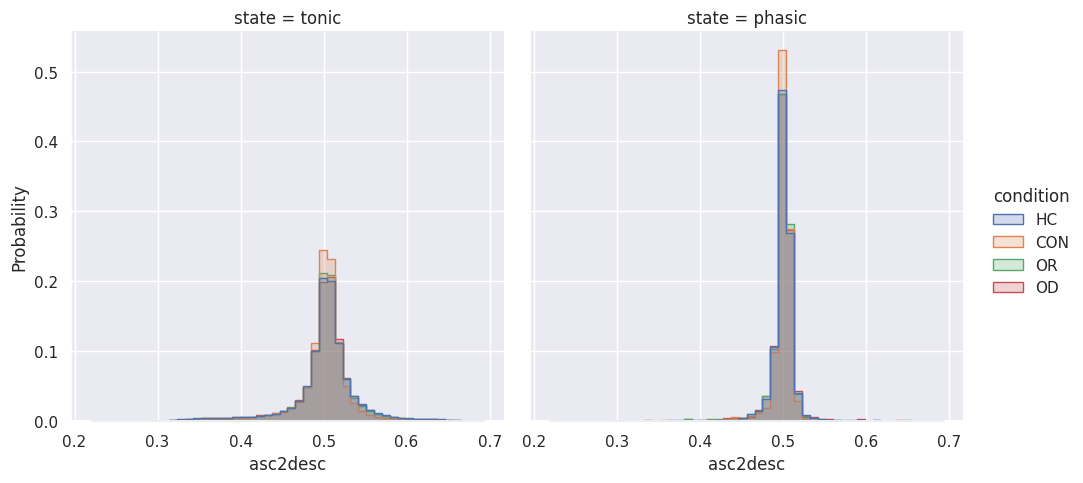

In [4]:
sns.displot(data=combined,
            x="asc2desc",
            hue="condition",
            stat="probability",
            element="step",
            bins=50,
            col="state",
            common_norm=False)

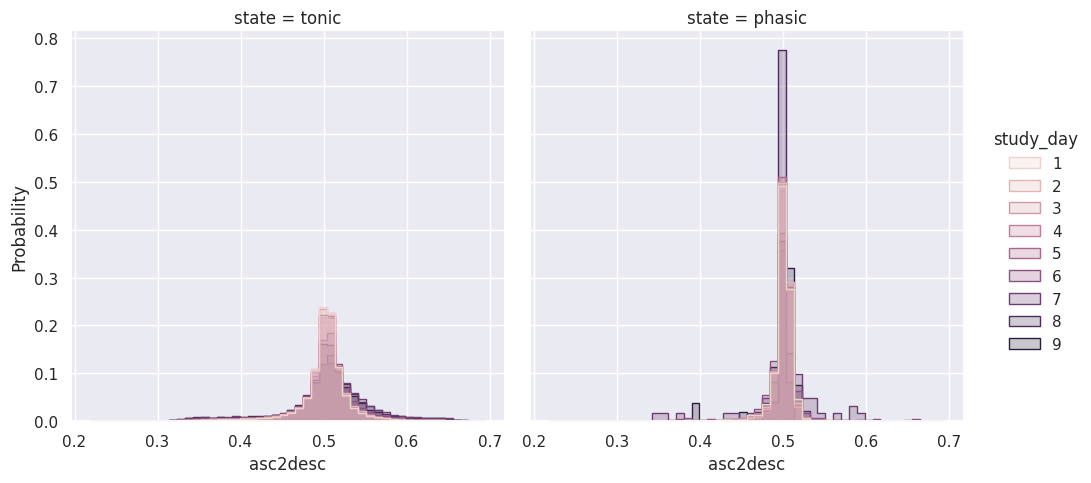

In [5]:
sns.displot(data=combined,
            x="asc2desc",
            hue="study_day",
            stat="probability",
            element="step",
            bins=50,
            col="state",
            common_norm=False)

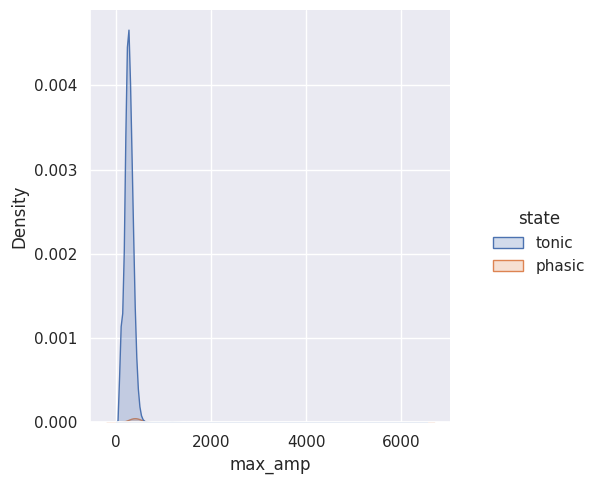

In [6]:
sns.displot(combined, x="max_amp", hue="state", kind="kde", fill=True)

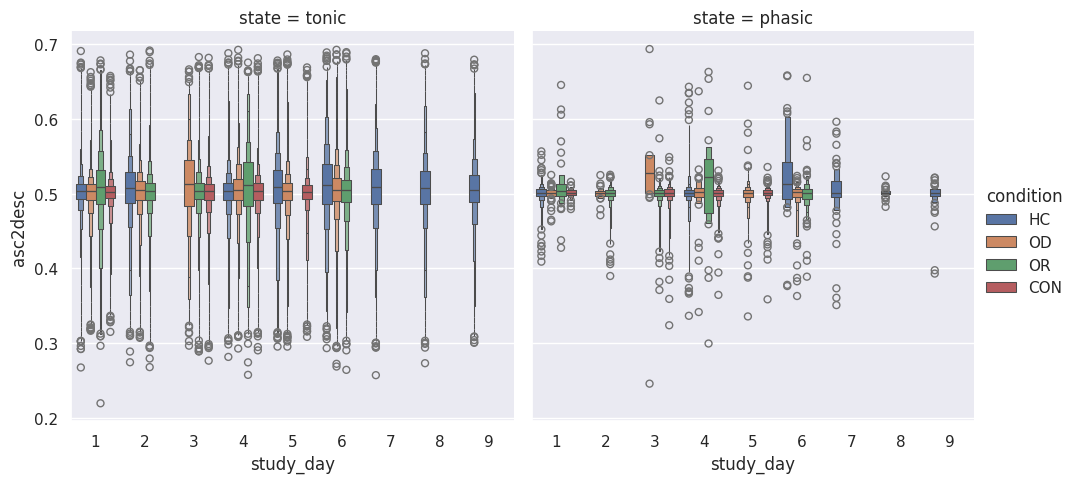

In [7]:
sns.catplot(data=combined, x="study_day", y="asc2desc", hue="condition", kind="boxen",col="state")

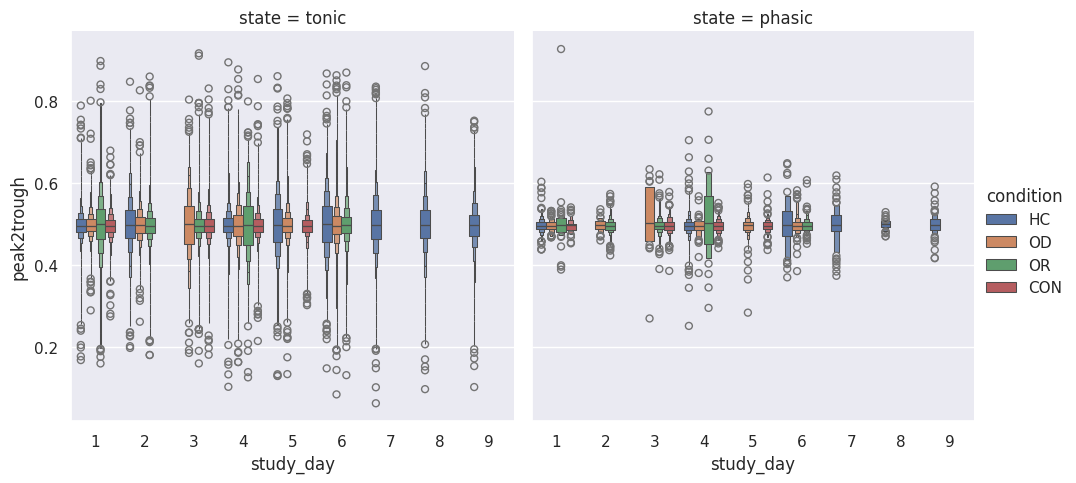

In [8]:
sns.catplot(data=combined, x="study_day", y="peak2trough", hue="condition", kind="boxen",col="state")

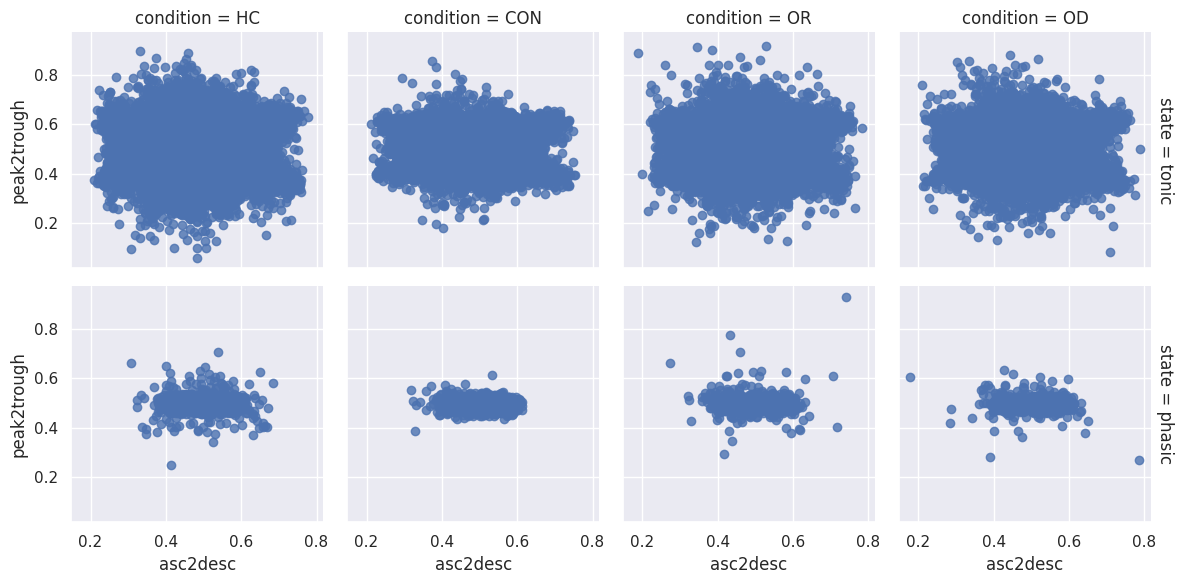

In [9]:
g = sns.FacetGrid(combined, row="state", col="condition", margin_titles=True)
g.map(sns.regplot, "asc2desc", "peak2trough", fit_reg=False, x_jitter=.1)

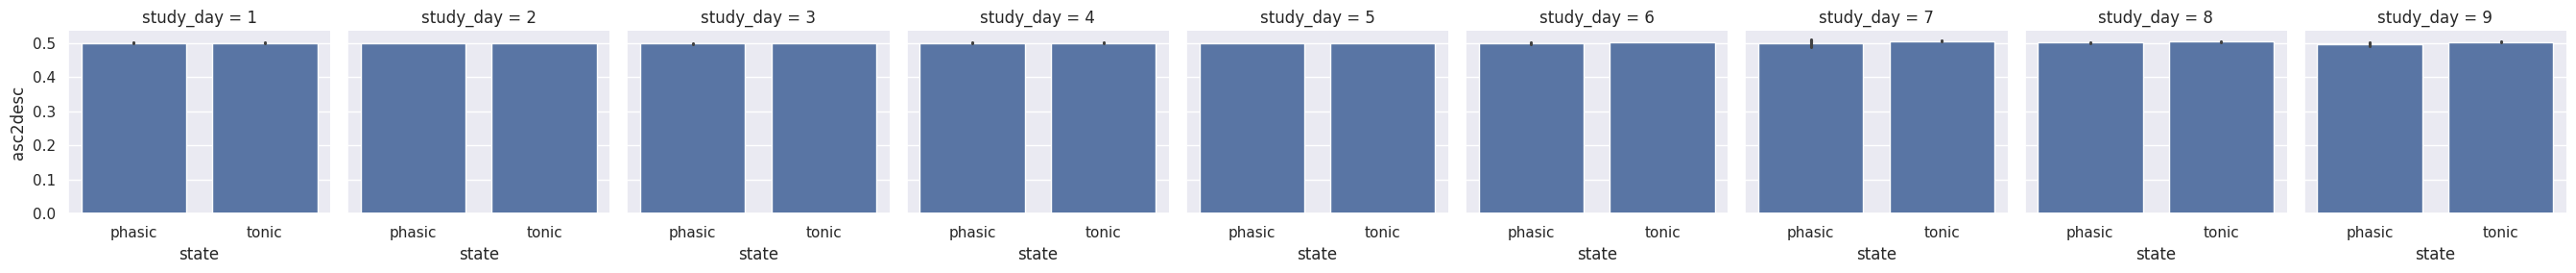

In [10]:
g = sns.FacetGrid(combined, col="study_day")
g.map(sns.barplot, "state", "asc2desc", order=["phasic", "tonic"])

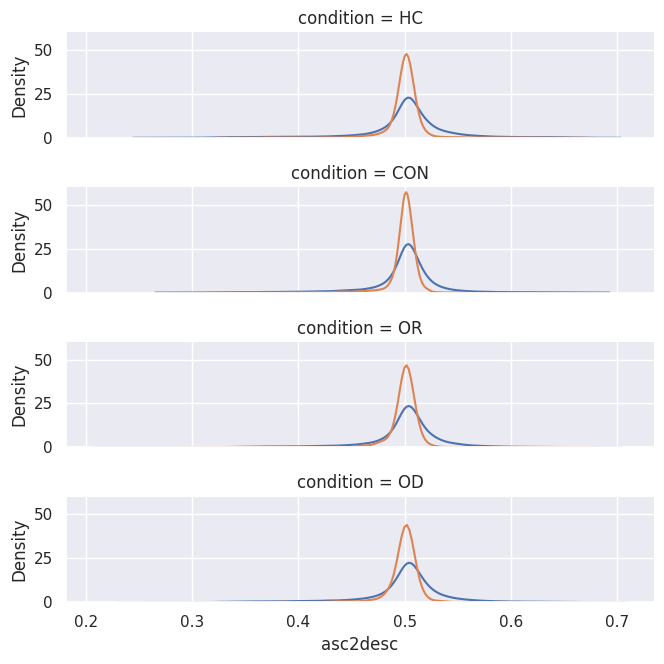

In [11]:
g = sns.FacetGrid(combined, row="condition",
                  height=1.7, aspect=4, hue="state")
g.map(sns.kdeplot, "asc2desc")

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


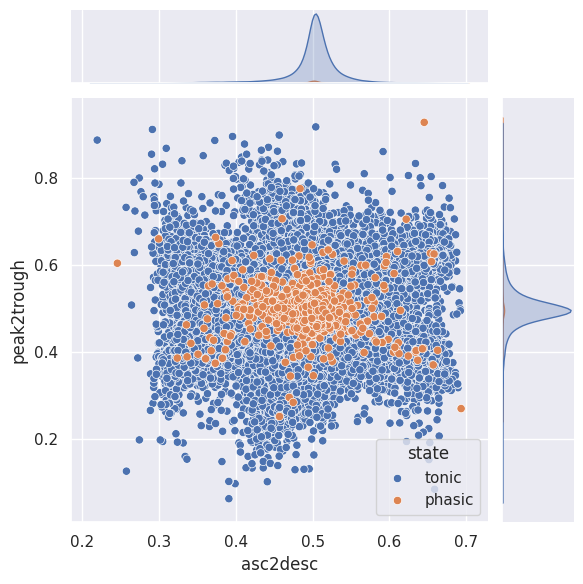

In [12]:
sns.jointplot(data=combined, x="asc2desc", y="peak2trough", hue="state")

<Axes: xlabel='asc2desc', ylabel='peak2trough'>

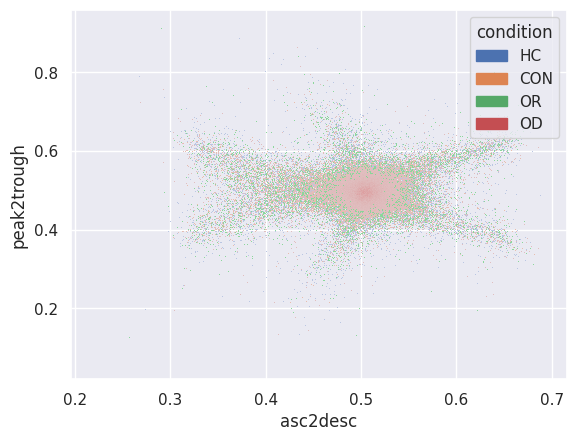

In [13]:
sns.histplot(data=combined[combined["state"]=="tonic"], x="asc2desc", y="peak2trough", hue="condition", stat="density")

<Axes: xlabel='asc2desc', ylabel='peak2trough'>

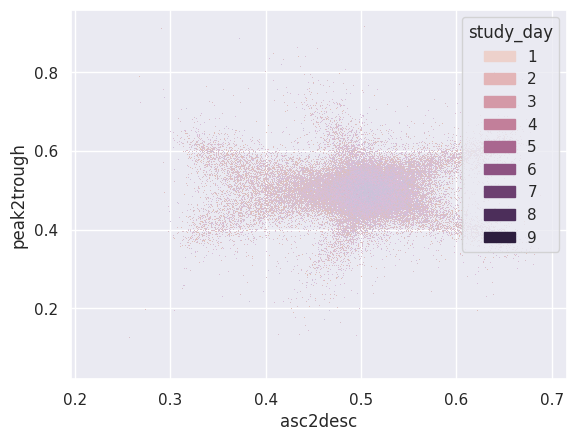

In [14]:
sns.histplot(data=combined[combined["state"]=="tonic"], x="asc2desc", y="peak2trough", hue="study_day", stat="density")

<Axes: xlabel='asc2desc', ylabel='peak2trough'>

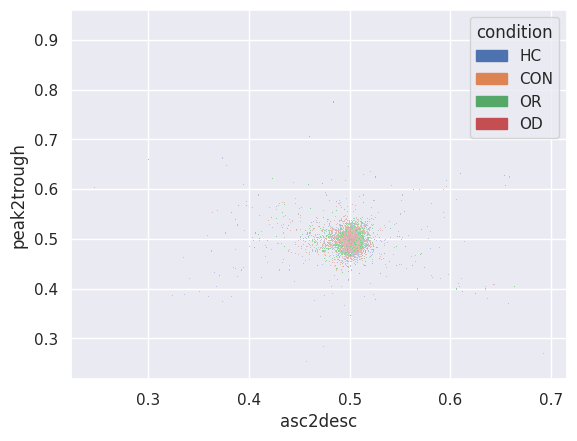

In [15]:
sns.histplot(data=combined[combined["state"]=="phasic"], x="asc2desc", y="peak2trough", hue="condition", stat="density")

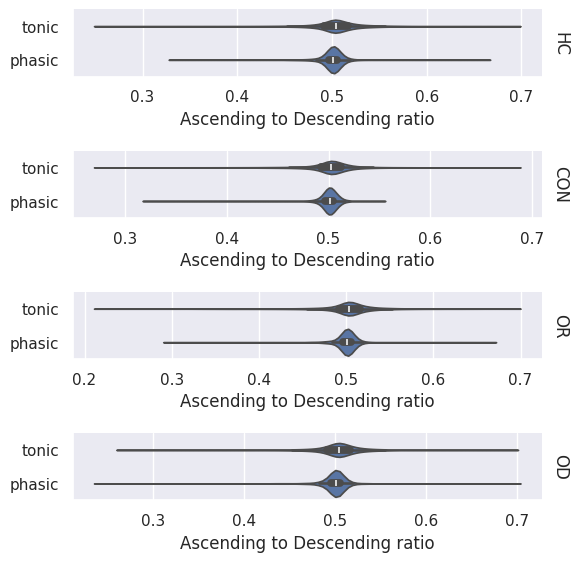

In [17]:
g = sns.catplot(
    data=combined,
    x="asc2desc", y="state", row="condition",
    kind="violin", orient="h",
    sharex=False, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="Ascending to Descending ratio", ylabel="")
g.set_titles(row_template="{row_name}")